In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
action_value = [np.random.normal() for i in range(10)]


In [4]:
optimal_action = np.argmax(action_value)

In [5]:
T = 1000
explore  = 0.1
percent_reward_table = [[0 for i in range(2000)] for j in  range(T)]
percent_optimal_action = [[0 for i in range(2000)] for j in range(T)]
for j in range(2000):
    predicted_value = [0 for i in range(10)]
    appearance_table = [0 for i in range(10)]
    total_reward = 0
    for i in range(T):
        outcome = random.choices([0,1],weights= [explore,1-explore])[0]
        if outcome == 0:
            A = random.choice(range(10))
        else:
            A = np.argmax(predicted_value)
        R =   np.random.normal() + action_value[A]
        total_reward+=R
        appearance_table[A] +=1
        predicted_value[A] += (R - predicted_value[A])/appearance_table[A]
        percent_reward_table[i][j] = total_reward/(i+1)
        percent_optimal_action[i][j] = appearance_table[optimal_action]/(i+1)

In [6]:
for row in percent_reward_table:
    print(sum(row))

848.3706823174515
832.0903277537373
741.0411123412395
761.0703672813108
820.1306379564088
867.2329150858312
915.2315626682688
958.1536236015454
1016.5996469399511
1059.9656566554374
1098.3811195943126
1131.354056286592
1159.4915322725917
1186.3441297558302
1212.6706284813777
1234.7224306420676
1259.6061830448368
1279.6113440820734
1296.2117033924883
1313.037302037873
1334.8894000846738
1351.0127722645964
1366.5322710071712
1385.0111952975742
1398.84881963342
1414.002140786553
1429.8925847849741
1443.538873164255
1458.9529382006233
1472.4315092200868
1483.7500077137854
1496.1528807373409
1507.1948108355461
1520.2641209506314
1531.8298915320331
1543.830843065108
1553.1859893338428
1564.9158247903624
1573.7551591240842
1583.7046395408227
1595.8479219488945
1604.9602195023292
1612.3199520897865
1621.3340175901849
1631.4827927885697
1639.2406538514513
1648.858492241727
1657.630451160027
1667.0031824196801
1674.9503623593237
1683.5998594409677
1690.660702407137
1697.9069301132763
1706.515894

In [7]:
average_reward_over_time = [sum(row)/2000 for row in percent_reward_table]
average_optimal_action = [sum(row)/2000 for row in percent_optimal_action]

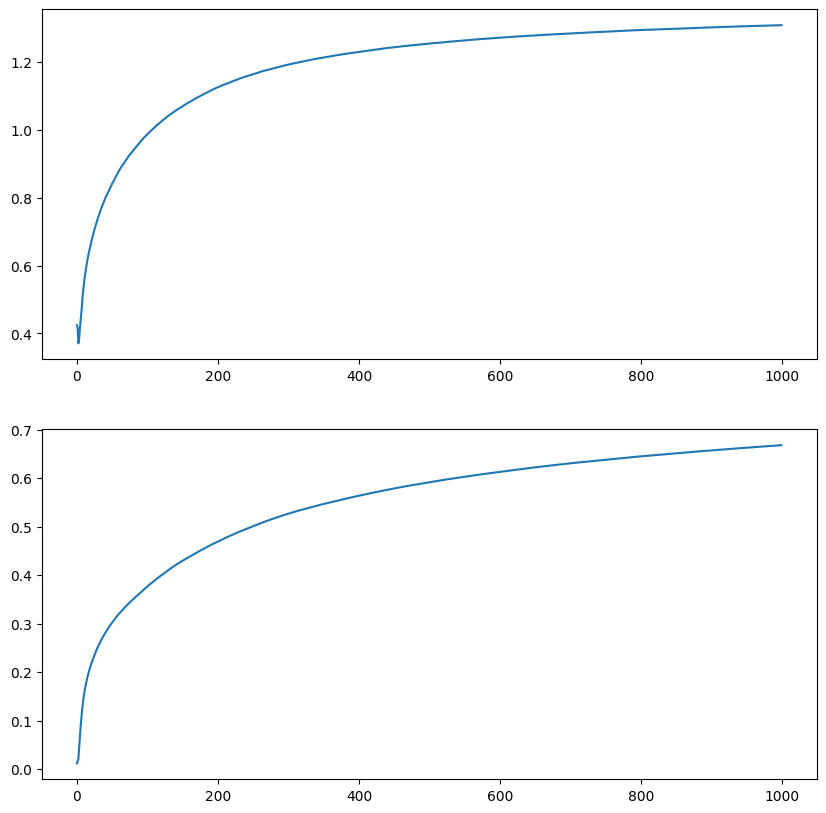

In [8]:
fig, ax = plt.subplots(2, figsize = (10,10))
ax[0].plot(average_reward_over_time)
ax[1].plot(average_optimal_action);